# Week 8

### Part 2: A short data story / micro-project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from scipy import stats
df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240217.csv")
df = df.drop(df[pd.DatetimeIndex(df['Date']).year == 2018].index)


In [4]:
features = ['DRUNKENNESS','DRIVING UNDER THE INFLUENCE','DRUG/NARCOTIC','LIQUOR LAWS']
df_used = df[df['Category'].isin(features)]

df_used['Date'] = pd.DatetimeIndex(df_used['Date']).day_name()



grouping = df_used.groupby(['Date','Category']).size().reset_index(name='Count')
pivot =  grouping.pivot(index='Date',columns='Category',values='Count')
print(pivot)

         Date                     Category  Count
0      Friday  DRIVING UNDER THE INFLUENCE    856
1      Friday                DRUG/NARCOTIC  16009
2      Friday                  DRUNKENNESS   1414
3      Monday  DRIVING UNDER THE INFLUENCE    629
4      Monday                DRUG/NARCOTIC  16448
5      Monday                  DRUNKENNESS   1176
6    Saturday  DRIVING UNDER THE INFLUENCE   1139
7    Saturday                DRUG/NARCOTIC  13950
8    Saturday                  DRUNKENNESS   1823
9      Sunday  DRIVING UNDER THE INFLUENCE   1102
10     Sunday                DRUG/NARCOTIC  13215
11     Sunday                  DRUNKENNESS   1878
12   Thursday  DRIVING UNDER THE INFLUENCE    682
13   Thursday                DRUG/NARCOTIC  18052
14   Thursday                  DRUNKENNESS   1133
15    Tuesday  DRIVING UNDER THE INFLUENCE    580
16    Tuesday                DRUG/NARCOTIC  18574
17    Tuesday                  DRUNKENNESS   1087
18  Wednesday  DRIVING UNDER THE INFLUENCE    572


C:\Users\danie\AppData\Local\Temp\ipykernel_24324\693018584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_used['Date'] = pd.DatetimeIndex(df_used['Date']).day_name()


In [6]:
# from bokeh.io import push_notebook, show, output_notebook, output_file
# from bokeh.layouts import row
# from bokeh.plotting import figure
# from bokeh.models import *
# from bokeh.palettes import Category20
# output_notebook()
# output_file("bokeh.html")

# source = ColumnDataSource(pivot)
# ## it is a standard way to convert your df to bokeh
# days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# p = figure(x_range = FactorRange(factors=days), title="Crimes per day", width=1100, x_axis_label='Day of the week',y_axis_label='Crime ocurrence per day') 

# colors = Category20[len(features)]
# print(colors)

# bar ={} # to store vbars
# items = [] ### for the custom legend // you need to figure out where to add it
# ### here we will do a for loop:
# for indx,i in enumerate(features):
#     bar[i] = p.vbar(x='Date',  top=i, source= source, fill_alpha=0.8,
#                     ### we will create a vbar for each focuscrime
#                     muted_alpha=0.05, muted = True, width = 0.5, fill_color=colors[indx]) 
#     items.append((i, [bar[i]])) ### figure where to add it
# #i stands for a column that we use, top=y; we are specifying that our numbers comes from column i
# #read up what legend_label, muted and muted_alpha do... you can add more attributes (you HAVE TO)
# legend = Legend(items=items, location=(0,50)) ## figure where to add it

# p.add_layout(legend, 'left') ## figure where to add it
# p.legend.click_policy="mute" ### assigns the click policy (you can try to use ''hide'
# show(p) #displays your plot

Loading BokehJS ...

('#1f77b4', '#aec7e8', '#ff7f0e')


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

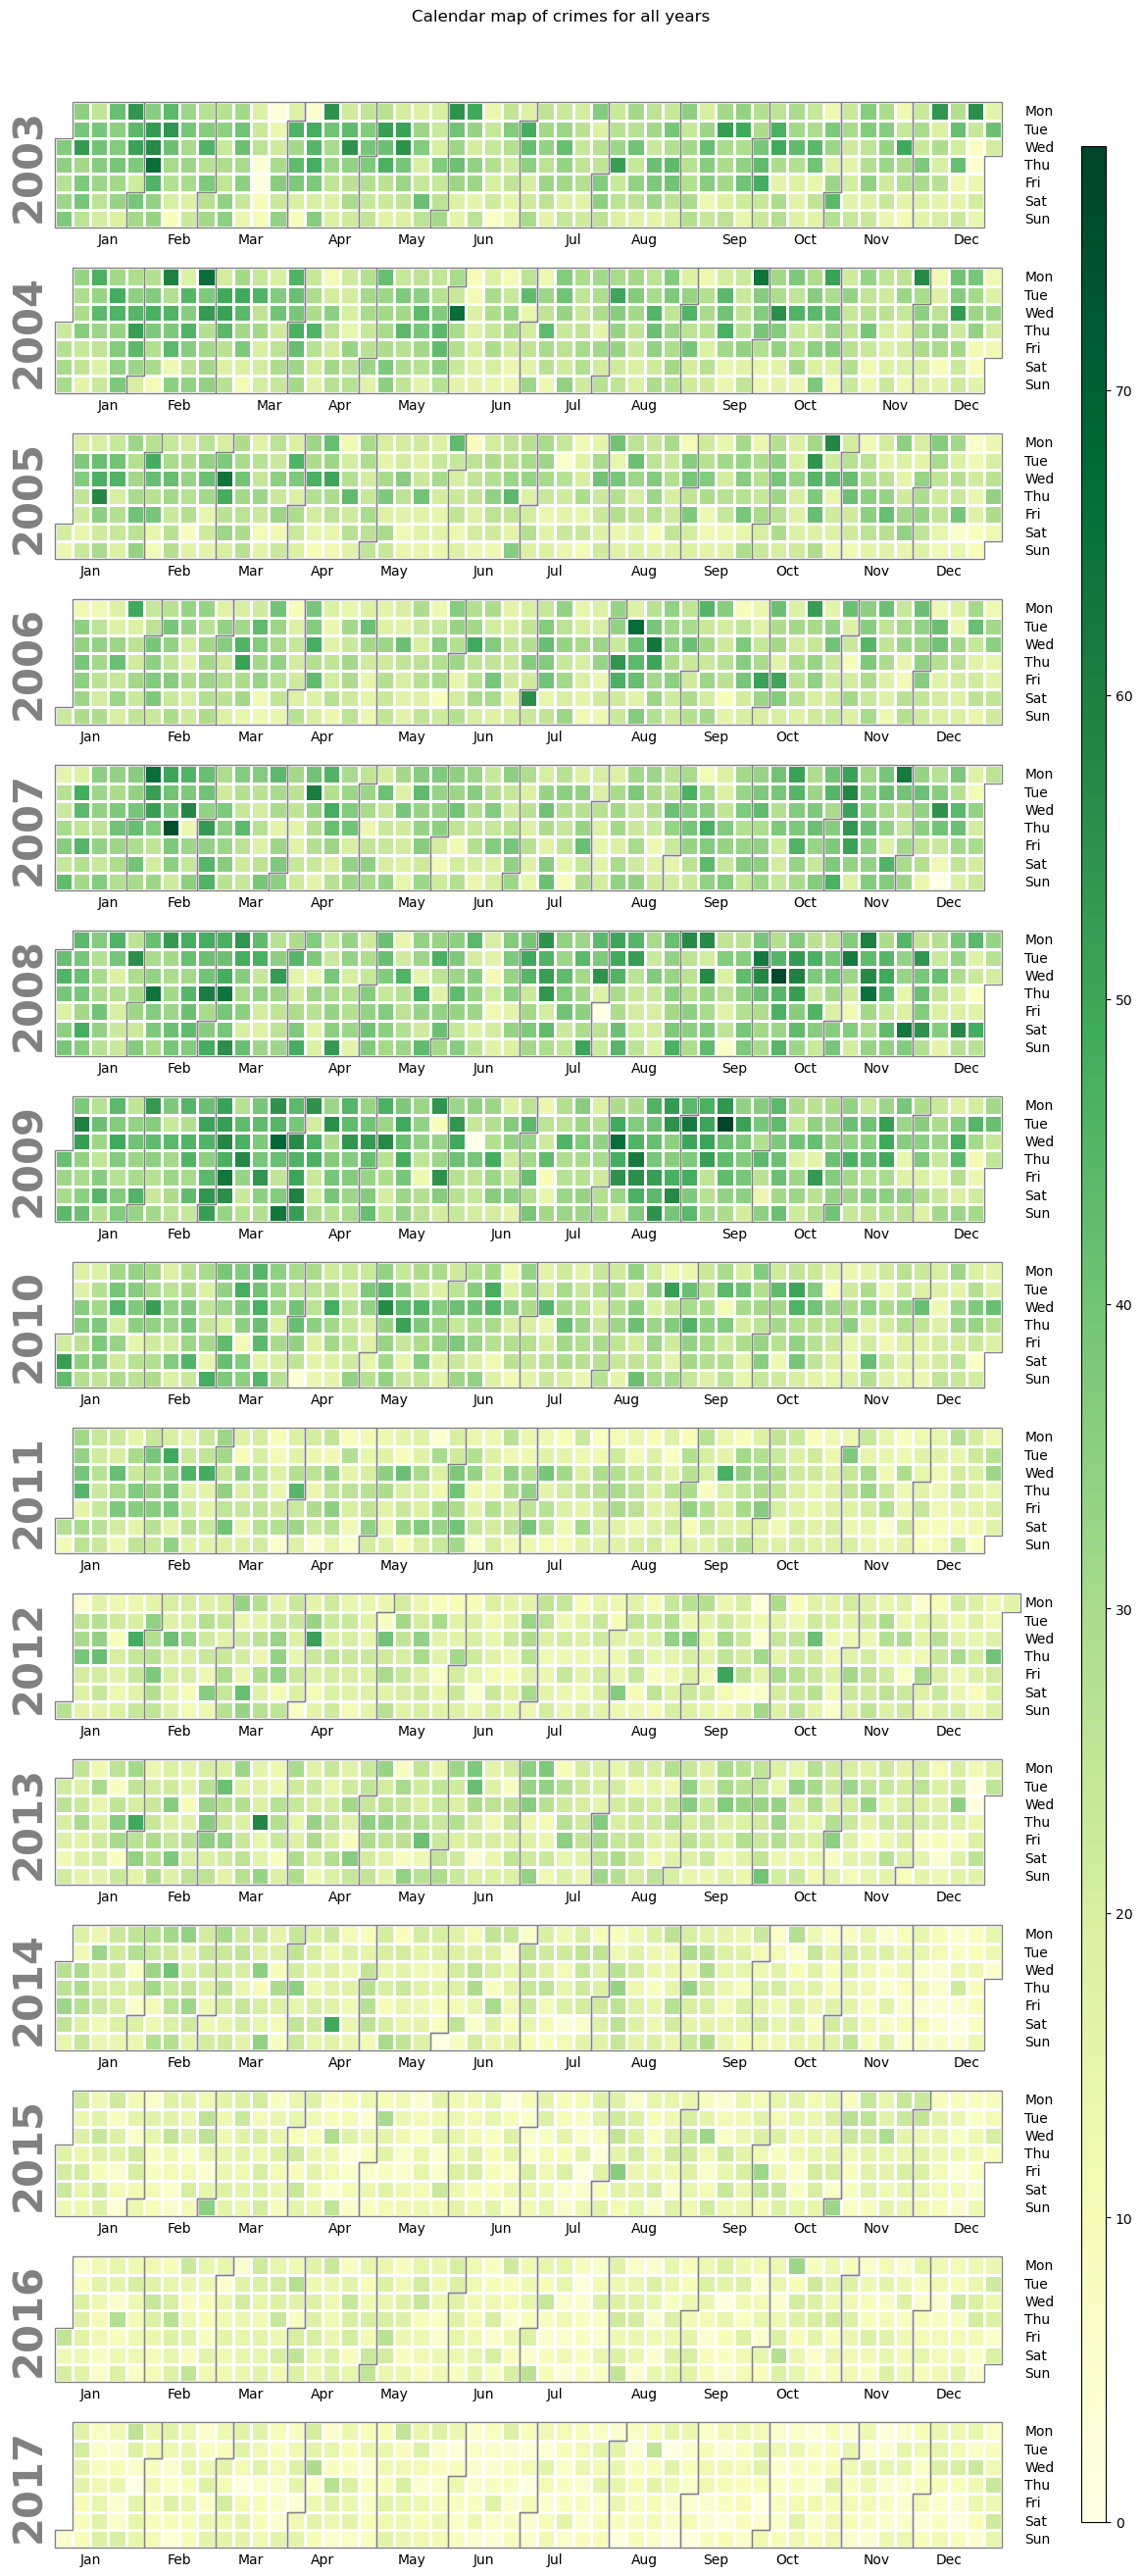

In [10]:
# Calendar plots
import calplot

df2 = df[df['Category'].isin(features)]
grouping = df2.groupby(['Date']).size().reset_index(name='Count')
grouping['Date'] = pd.to_datetime(grouping['Date'])
events = pd.Series(grouping['Count'].to_numpy(),index=grouping['Date'])
fig = calplot.calplot(events, cmap='YlGn',colorbar=True, suptitle='Calendar map of crimes for all years')